In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

In [4]:
(x_train,y_train) , (x_test,y_test)=cifar10.load_data()

170500096/170498071 [==============================] - 403s 2us/step


In [5]:
type(x_train)
type(y_train)
type(x_test)
type(y_test)

numpy.ndarray

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

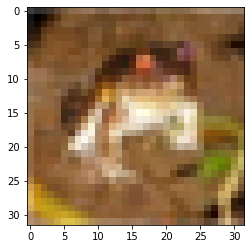

In [9]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
y_train[0]

array([6], dtype=uint8)

In [13]:
classfication=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(classfication[y_train[1][0]])

truck


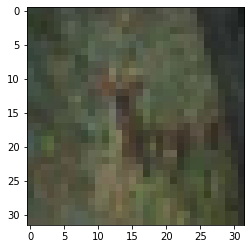

In [14]:
plt.imshow(x_train[10],cmap=plt.cm.binary)

In [15]:
print(classfication[y_train[10][0]])

deer


In [16]:
y_train_hot_one=to_categorical(y_train)
y_test_hot_one=to_categorical(y_test)

In [17]:
y_train_hot_one

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
print(y_train_hot_one[10])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [22]:
x_train=x_train/255
x_test=x_test/255

In [23]:
x_train[10]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [24]:
model=Sequential()

In [25]:
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [26]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
a=model.fit(x_train,y_train_hot_one,batch_size=256,epochs=10,validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 18s 113ms/step - loss: 1.7629 - accuracy: 0.3501 - val_loss: 1.5155 - val_accuracy: 0.4529
Epoch 2/10
157/157 [==============================] - 18s 115ms/step - loss: 1.4317 - accuracy: 0.4778 - val_loss: 1.3116 - val_accuracy: 0.5316
Epoch 3/10
157/157 [==============================] - 19s 118ms/step - loss: 1.2938 - accuracy: 0.5361 - val_loss: 1.2296 - val_accuracy: 0.5598
Epoch 4/10
157/157 [==============================] - 20s 125ms/step - loss: 1.2072 - accuracy: 0.5681 - val_loss: 1.2322 - val_accuracy: 0.5565
Epoch 5/10
157/157 [==============================] - 19s 123ms/step - loss: 1.1270 - accuracy: 0.6028 - val_loss: 1.0683 - val_accuracy: 0.6275
Epoch 6/10
157/157 [==============================] - 19s 121ms/step - loss: 1.0569 - accuracy: 0.6271 - val_loss: 1.0622 - val_accuracy: 0.6302
Epoch 7/10
157/157 [==============================] - 19s 124ms/step - loss: 1.0184 - accuracy: 0.6440 - val_loss: 1.0539 - val_ac

In [28]:
model.evaluate(x_test,y_test_hot_one)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.9173 - accuracy: 0.6778


0.6777999997138977

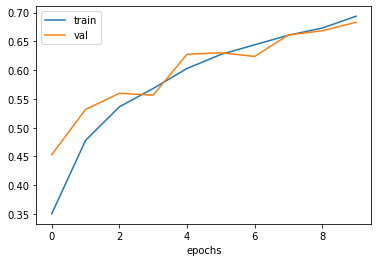

In [29]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

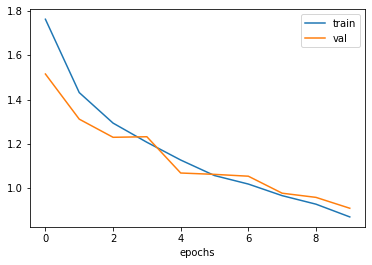

In [30]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.xlabel('epochs')
plt.legend(['train','val'])
plt.show()

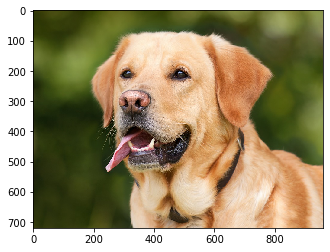

In [31]:
new_img=plt.imread('dataset/single_prediction/cat_or_dog_1.jpg')
img=plt.imshow(new_img)

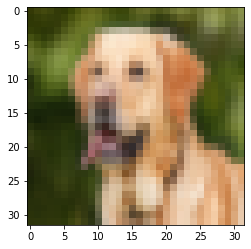

In [32]:
from skimage.transform import resize
res_img=resize(new_img,(32,32,3))
img=plt.imshow(res_img)

In [34]:
prediction=model.predict(np.array([res_img]))

prediction

array([[6.88784723e-07, 1.15875105e-08, 2.49825581e-03, 3.44143040e-03,
        5.01031335e-03, 9.83218729e-01, 7.68184313e-04, 5.05610555e-03,
        1.87687856e-08, 6.25339908e-06]], dtype=float32)

In [35]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp

print(list_index)

[5, 7, 4, 3, 2, 6, 9, 0, 8, 1]


In [38]:
for i in range(5):
    print(classfication[list_index[i]],':', round(prediction[0][list_index[i]]*100))
    

dog : 98.0
horse : 1.0
deer : 1.0
cat : 0.0
bird : 0.0
